In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [42]:
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [48]:
batch_size = 512
epochs = 100
learning_rate = 1e-3

In [44]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

In [45]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.sigmoid(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.sigmoid(activation)
        return reconstructed

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AE(input_shape=784).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

criterion = nn.MSELoss()

In [49]:

for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        batch_features = batch_features.view(-1, 784).to(device)
        
        optimizer.zero_grad()
        
        outputs = model(batch_features)
        
        train_loss = criterion(outputs, batch_features)
        
        train_loss.backward()
        
        optimizer.step()
        
        loss += train_loss.item()
    
    loss = loss / len(train_loader)
    
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))

epoch : 1/100, recon loss = 0.03942671
epoch : 2/100, recon loss = 0.03794590
epoch : 3/100, recon loss = 0.03586266
epoch : 4/100, recon loss = 0.03348198
epoch : 5/100, recon loss = 0.03134171
epoch : 6/100, recon loss = 0.02934045
epoch : 7/100, recon loss = 0.02732071
epoch : 8/100, recon loss = 0.02587734
epoch : 9/100, recon loss = 0.02467648
epoch : 10/100, recon loss = 0.02379998
epoch : 11/100, recon loss = 0.02284766
epoch : 12/100, recon loss = 0.02166009
epoch : 13/100, recon loss = 0.02069024
epoch : 14/100, recon loss = 0.01997665
epoch : 15/100, recon loss = 0.01933771
epoch : 16/100, recon loss = 0.01870207
epoch : 17/100, recon loss = 0.01810561
epoch : 18/100, recon loss = 0.01755528
epoch : 19/100, recon loss = 0.01708764
epoch : 20/100, recon loss = 0.01663979
epoch : 21/100, recon loss = 0.01599353
epoch : 22/100, recon loss = 0.01552004
epoch : 23/100, recon loss = 0.01510501
epoch : 24/100, recon loss = 0.01472413
epoch : 25/100, recon loss = 0.01435679
epoch : 2

In [51]:
test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False
)

test_examples = None

with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features.view(-1, 784).to(device)
        reconstruction = model(test_examples)
        break

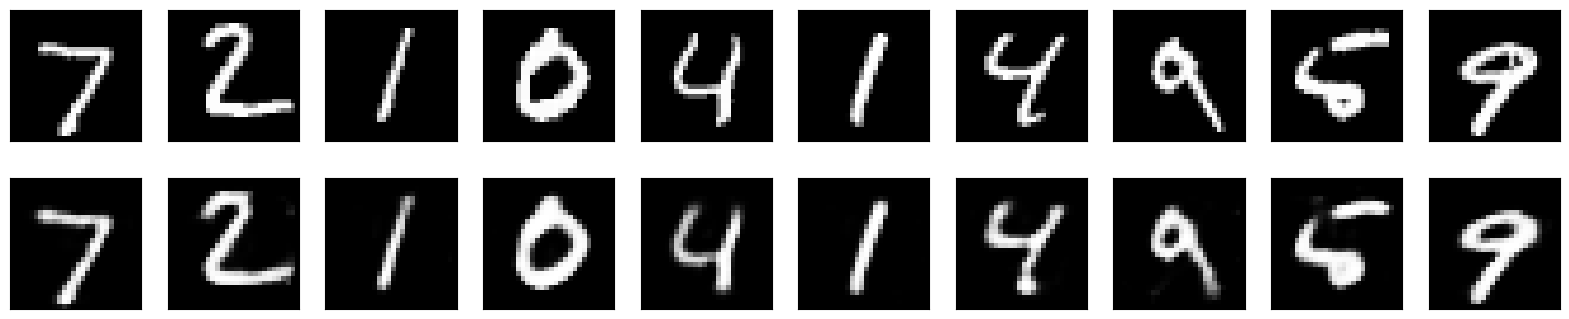

In [53]:
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()